In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv("../normalized_character_datasets/normalized_dataset_0.csv")
df = pd.read_csv("../flattened_window_datasets/windowed_dataset_0.csv")

print("Dataset Overview")
print(df.shape)
print(df.dtypes)

# Nulls
print("\n🕳️ Missing Values:")
print(df.isnull().sum())

Dataset Overview
(25155, 306)
timer_t-5                 int64
fight_result_t-5         object
has_round_started_t-5      bool
is_round_over_t-5          bool
player1_id_t-5            int64
                          ...  
player2_buttons_b          bool
player2_buttons_x          bool
player2_buttons_a          bool
player2_buttons_l          bool
player2_buttons_r          bool
Length: 306, dtype: object

🕳️ Missing Values:
timer_t-5                0
fight_result_t-5         0
has_round_started_t-5    0
is_round_over_t-5        0
player1_id_t-5           0
                        ..
player2_buttons_b        0
player2_buttons_x        0
player2_buttons_a        0
player2_buttons_l        0
player2_buttons_r        0
Length: 306, dtype: int64


In [36]:

# Constant columns (not useful)
print("\n⚠️ Columns with Constant Values:")
print([col for col in df.columns if df[col].nunique() == 1])


⚠️ Columns with Constant Values:
['player1_id_t-5', 'player1_buttons_up_t-5', 'player1_buttons_down_t-5', 'player1_buttons_right_t-5', 'player1_buttons_left_t-5', 'player1_buttons_select_t-5', 'player1_buttons_start_t-5', 'player2_buttons_up_t-5', 'player2_buttons_down_t-5', 'player2_buttons_right_t-5', 'player2_buttons_left_t-5', 'player2_buttons_select_t-5', 'player2_buttons_start_t-5', 'player2_buttons_y_t-5', 'player2_buttons_b_t-5', 'player2_buttons_x_t-5', 'player2_buttons_a_t-5', 'player2_buttons_l_t-5', 'player2_buttons_r_t-5', 'player1_id_t-4', 'player1_buttons_up_t-4', 'player1_buttons_down_t-4', 'player1_buttons_right_t-4', 'player1_buttons_left_t-4', 'player1_buttons_select_t-4', 'player1_buttons_start_t-4', 'player2_buttons_up_t-4', 'player2_buttons_down_t-4', 'player2_buttons_right_t-4', 'player2_buttons_left_t-4', 'player2_buttons_select_t-4', 'player2_buttons_start_t-4', 'player2_buttons_y_t-4', 'player2_buttons_b_t-4', 'player2_buttons_x_t-4', 'player2_buttons_a_t-4',

In [37]:
# Boolean column distribution
bool_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'bool']
print("\n📊 Boolean Column Distributions:")
for col in bool_cols:
    print(f"{col}:\n{df[col].value_counts(normalize=True)}\n")


📊 Boolean Column Distributions:
has_round_started_t-5:
has_round_started_t-5
True     0.978295
False    0.021705
Name: proportion, dtype: float64

is_round_over_t-5:
is_round_over_t-5
False    0.999205
True     0.000795
Name: proportion, dtype: float64

p1_jumping_t-5:
p1_jumping_t-5
False    0.699702
True     0.300298
Name: proportion, dtype: float64

p1_crouching_t-5:
p1_crouching_t-5
False    0.923554
True     0.076446
Name: proportion, dtype: float64

p1_in_move_t-5:
p1_in_move_t-5
False    0.641503
True     0.358497
Name: proportion, dtype: float64

p2_jumping_t-5:
p2_jumping_t-5
False    0.747088
True     0.252912
Name: proportion, dtype: float64

p2_crouching_t-5:
p2_crouching_t-5
False    0.901531
True     0.098469
Name: proportion, dtype: float64

p2_in_move_t-5:
p2_in_move_t-5
False    0.715643
True     0.284357
Name: proportion, dtype: float64

player1_buttons_y_t-5:
player1_buttons_y_t-5
False    0.967879
True     0.032121
Name: proportion, dtype: float64

player1_buttons_

In [38]:

# Numerical columns summary
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\n📈 Numeric Summary Stats:")
print(df[num_cols].describe())



📈 Numeric Summary Stats:
          timer_t-5  player1_id_t-5  p1_health_t-5      p1_x_t-5  \
count  25155.000000         25155.0   25155.000000  25155.000000   
mean     109.637011             0.0     100.809938    267.744305   
std       31.465196             0.0      57.799681    103.734792   
min        0.000000             0.0       0.000000     15.000000   
25%       88.000000             0.0      53.000000    192.000000   
50%      115.000000             0.0     114.000000    266.000000   
75%      134.000000             0.0     149.000000    349.000000   
max      153.000000             0.0     255.000000   1919.000000   

           p1_y_t-5  p1_move_id_t-5  player2_id_t-5  p2_health_t-5  \
count  25155.000000    2.515500e+04    25155.000000   25155.000000   
mean     177.082608    9.899758e+06        3.323395     107.322520   
std       24.397376    1.934221e+07        3.078782      62.377047   
min        0.000000    0.000000e+00        0.000000       0.000000   
25%      17

In [39]:

# Check correlation with output buttons
button_cols = [col for col in df.columns if 'player1_buttons_' in col]  # change if analyzing P2
corr = df[num_cols.union(bool_cols)].corrwith(df[button_cols].sum(axis=1))
print("\n🔗 Correlation of Features with Button Press Sum (P1):")
print(corr.sort_values(ascending=False))




🔗 Correlation of Features with Button Press Sum (P1):
player1_buttons_x_t-2    0.541122
player1_buttons_x_t-1    0.539508
player1_buttons_x_t-3    0.532671
player1_buttons_x        0.520707
player1_buttons_x_t-0    0.520707
                           ...   
player1_id_t-1                NaN
player1_id_t-2                NaN
player1_id_t-3                NaN
player1_id_t-4                NaN
player1_id_t-5                NaN
Length: 174, dtype: float64


c:\Users\Abdullah Mansoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Abdullah Mansoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


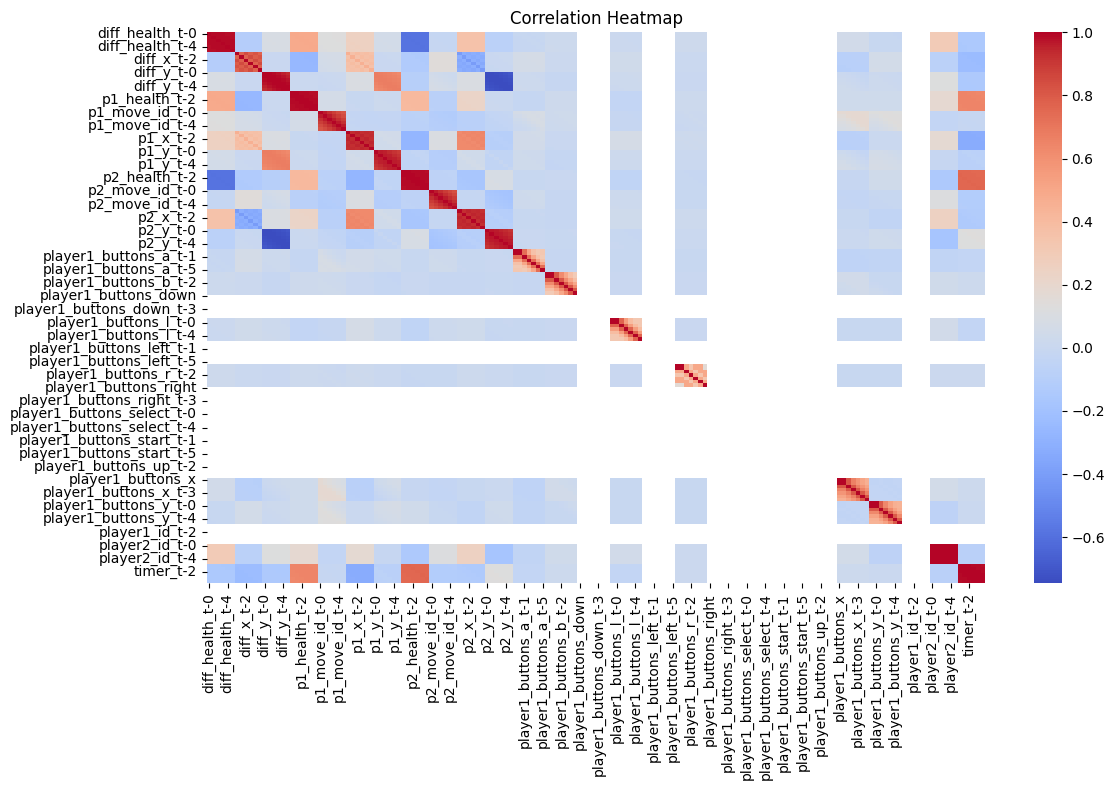

In [40]:

# Plot heatmap of all numeric correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols.union(button_cols)].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [41]:

# Optional: Check imbalance in button outputs
button_activity = df[button_cols].sum()
print("\n🕹️ Button Press Frequencies:")
print(button_activity.sort_values(ascending=False))



🕹️ Button Press Frequencies:
player1_buttons_x_t-5     1276
player1_buttons_x_t-2     1276
player1_buttons_x_t-3     1276
player1_buttons_x_t-4     1276
player1_buttons_x_t-1     1276
                          ... 
player1_buttons_up           0
player1_buttons_left         0
player1_buttons_right        0
player1_buttons_select       0
player1_buttons_start        0
Length: 84, dtype: int64


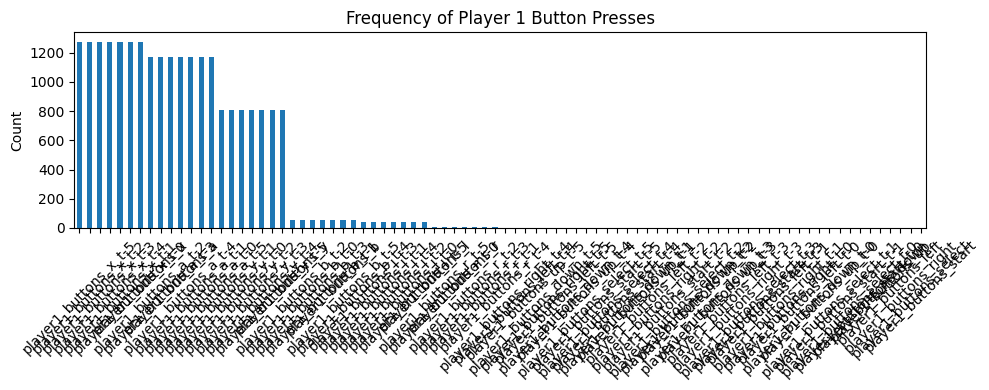

In [42]:

# Plot button activity
plt.figure(figsize=(10, 4))
button_activity.sort_values(ascending=False).plot(kind='bar')
plt.title("Frequency of Player 1 Button Presses")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()